In [9]:
import torch
from torch import nn
import numpy as np

In [4]:
from torchvision.models import alexnet
model = alexnet(pretrained=True)
model.features

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\lixin/.cache\torch\hub\checkpoints\alexnet-owt-4df8aa71.pth
10.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

24.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

38.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--Noteboo

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [7]:
conv1 = nn.Sequential(*model.features[:1])
conv2 = nn.Sequential(*model.features[:4])

In [10]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

data_train = MNIST('./data',
                   download=True,
                   transform=transforms.Compose([transforms.Resize((32,32)),
                                                 transforms.ToTensor()])
                   )
data_test = MNIST('./data',
                  download=True,
                  train=False,
                  transform=transforms.Compose([transforms.Resize((32,32)),
                                                 transforms.ToTensor()]))
data_train_loader = DataLoader(data_train,batch_size=256,shuffle=True,num_workers=8)
data_test_loader = DataLoader(data_test,batch_size=1024,num_workers=8)

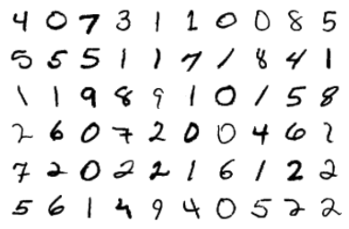

In [52]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 60

for imgs,target in data_train_loader:
    break

for index in range(num_of_images):
    plt.subplot(6,10,index+1)
    plt.axis('off')
    img = imgs[index]
    plt.imshow(img.squeeze(),cmap='gray_r')
plt.show()

In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 =nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3)
        self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,3)
        self.pool2 = nn.MaxPool2d(2,2)
        self.fc3 = nn.Linear(16*6*6,120)
        self.fc4 = nn.Linear(120,84)
        self.fc5 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool1(torch.relu(self.conv1(x)))
        print(x.shape)
        x = self.pool2(torch.relu(self.conv2(x)))
        print(x.shape)
        x = x.view(x.size(0),-1)
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x


In [5]:
from torch import optim

model = LeNet()
model.train()
lr = 0.01
criterion = nn.CrossEntropyLoss()   #损失函数
optimizer = optim.SGD(model.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4)   #随机梯度优化
train_loss = []
data = data_train.data
correct = 0
total = 0
log_interval = 1000


NameError: name 'LeNet' is not defined

In [8]:

def train(epoch):
    global train_loss,correct,total
    for batch_idx,(inputs,targets) in enumerate(data_train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,targets)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        _,predicted = outputs.max(1)
        total = total+targets.size(0)
        correct = correct+predicted.eq(targets).sum().item()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(data),100. * batch_idx / len(data), loss.item()))
            print(batch_idx,len(data_train.data),'Acc: {0:4f}%({1}/{2})'.format(100.*correct/total,correct,total))
train(1)

NameError: name 'data_train_loader' is not defined

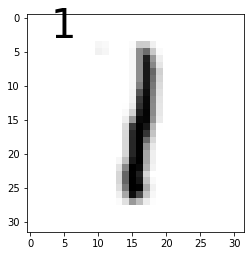

In [33]:
i = np.random.randint(0,784)
p = plt.imshow(inputs[i].squeeze(),cmap='gray_r')
plt.text(3, 3, str(targets[i].numpy()),
                 size = 40,color='black')
plt.show()
x = inputs[i].numpy().squeeze()

In [34]:
len(data_train.data)

60000

In [ ]:

model_path = "./model.pth"
save_info = torch.load(model_path)
model.load_state_dict(save_info['model'])
model.eval()

with torch.no_grad():
    for batch_idx,(inputs,targets) in enumerate(data_test_loader):
        outputs = model(inputs)
        loss = criterion(outputs,targets)


        test_loss +=loss.item()
        _,predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        print(batch_idx,len(data_test_loader),'Loss:%.3f | Acc: %.3f%%(%d/%d)'
          % (test_loss/(batch_idx+1), 100.*correct/total,correct,total))